## Google Reviews por Estado 
En este notebook modelamos la data disponible de la plataforma de Google Maps, sus metadata-sitios y reviews  para solo quedarnos con los datos de interés para nuestro cliente:<br>
* Category = 'Convenience store'<br>
* Le agregamos información a las reviews asociandolas a un business_name, y una categoria atraves de gmap_id.
* Adicionalmente, traemos para ese sitio la Ciudad y Estado

### Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import os
from datetime import datetime

## 0.1 Reviews por Estado
Leemos todos los reviews (.json) por estado consolidandolos en un único dataframe por estado.

In [6]:
directorio = "data/Google Maps/reviews-estados"
output_directory = "state_parquet"

# Iterate over each folder in the base directory
for folder_name in os.listdir(directorio):
    # Construct the full path to the folder
    folder_path = os.path.join(directorio, folder_name)

    # Check if the item in the base directory is a folder
    if os.path.isdir(folder_path):
        # List to store the individual DataFrames
        dfs = []

        # Iterate over each file in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".json"):
                filepath = os.path.join(folder_path, filename)

                # Read the JSON file into a DataFrame
                df = pd.read_json(filepath, lines=True)

                # Add the DataFrame to the list
                dfs.append(df)

        # Concatenate all DataFrames into one
        df_combined = pd.concat(dfs, ignore_index=True)

        # Define the output file path
        output_file_path = os.path.join(output_directory, f"df_{folder_name}.parquet")

        # Store the DataFrame as a Parquet file
        df_combined.to_parquet(output_file_path, index=False)

        # Print a message confirming the storage location
        print(
            f"The combined DataFrame for {folder_name} was saved in {output_file_path}"
        )

The combined DataFrame for review-Alabama was saved in state_parquet\df_review-Alabama.parquet
The combined DataFrame for review-Alaska was saved in state_parquet\df_review-Alaska.parquet
The combined DataFrame for review-Arizona was saved in state_parquet\df_review-Arizona.parquet
The combined DataFrame for review-Arkansas was saved in state_parquet\df_review-Arkansas.parquet
The combined DataFrame for review-California was saved in state_parquet\df_review-California.parquet
The combined DataFrame for review-Colorado was saved in state_parquet\df_review-Colorado.parquet
The combined DataFrame for review-Connecticut was saved in state_parquet\df_review-Connecticut.parquet
The combined DataFrame for review-Delaware was saved in state_parquet\df_review-Delaware.parquet
The combined DataFrame for review-District_of_Columbia was saved in state_parquet\df_review-District_of_Columbia.parquet
The combined DataFrame for review-Florida was saved in state_parquet\df_review-Florida.parquet
The co

# 02. Filtramos cada Dataframe por Estado por la categoria de Interés
Filtramos cada uno de los Dataframes de Reviews por Estado para consolidar por la información de interés, categoria = 'Convenience store'<br>

In [46]:
# Path to the directory containing the dataframes
input_directory = "state_parquet"
output_directory = "filtered_df"

sitios_metadata = "data/Google Maps/metadata-sitios/df_convenience_clean_1.parquet"

df_sitios = pd.read_parquet(sitios_metadata)

# Iterate over each file in the input directory
for filename in os.listdir(input_directory):

    # Check if the file is a Parquet file
    if filename.endswith(".parquet"):
        # Read the DataFrame from the Parquet file
        df = pd.read_parquet(os.path.join(input_directory, filename))

        # Function to convert None values to 'No' and other values to 'Yes'
        def replace_none(value):
            if value is None:
                return "No"
            else:
                return "Yes"

        df["resp"] = df["resp"].apply(replace_none)

        # Perform information of each dataframe
        # Drop columns pics and resp
        df.drop(["pics"], axis=1, inplace=True)
        # Eliminate duplicate records
        df.drop_duplicates(inplace=True)

        # Merge dfreviewsGoogle1 and df_sitios based on the 'gmap_id' column
        df = df.merge(
            df_sitios[["gmap_id", "name", "category", "city"]], on="gmap_id", how="left"
        )

        # Rename the 'name_y' column from df_sitios to 'business_name' in the merged DataFrame
        df.rename(columns={"name_y": "business_name", "name_x": "name"}, inplace=True)

        # Drop rows with NaN values in 'business_name', 'City', and 'State' columns
        df = df.dropna(subset=["business_name", "city"])

        # Extract the state name from the filename
        state_name = filename.split("-")[-1].split(".")[0]

        # Add a new column 'State_review' with the state name to the DataFrame
        df["state_review"] = state_name

        # Store the transformed DataFrame in the output directory
        output_file_path = os.path.join(output_directory, filename)
        df.to_parquet(output_file_path, index=False)

        # Print a message confirming the storage location
        print(
            f"The transformed DataFrame for {filename} was saved in {output_file_path}"
        )

The transformed DataFrame for df_review-Alabama.parquet was saved in filtered_df\df_review-Alabama.parquet
The transformed DataFrame for df_review-Alaska.parquet was saved in filtered_df\df_review-Alaska.parquet
The transformed DataFrame for df_review-Arizona.parquet was saved in filtered_df\df_review-Arizona.parquet
The transformed DataFrame for df_review-Arkansas.parquet was saved in filtered_df\df_review-Arkansas.parquet
The transformed DataFrame for df_review-California.parquet was saved in filtered_df\df_review-California.parquet
The transformed DataFrame for df_review-Colorado.parquet was saved in filtered_df\df_review-Colorado.parquet
The transformed DataFrame for df_review-Connecticut.parquet was saved in filtered_df\df_review-Connecticut.parquet
The transformed DataFrame for df_review-Delaware.parquet was saved in filtered_df\df_review-Delaware.parquet
The transformed DataFrame for df_review-District_of_Columbia.parquet was saved in filtered_df\df_review-District_of_Columbia.p

In [3]:
# Path to the directory containing the dataframes
input_directory = "../../data/Google Maps/state_parquet"

# Iterate over each file in the input directory
for filename in os.listdir(input_directory):

    # Check if the file is a Parquet file
    if filename.endswith(".parquet"):
        # Read the DataFrame from the Parquet file
        df = pd.read_parquet(os.path.join(input_directory, filename))

        # Function to convert None values to 'No' and other values to 'Yes'
        def replace_none(value):
            if value is None:
                return "No"
            else:
                return "Yes"

        df["resp"] = df["resp"].apply(replace_none)

        # Perform information of each dataframe
        # Drop columns pics and resp
        df.drop(["pics"], axis=1, inplace=True)
        # Eliminate duplicate records
        df.drop_duplicates(inplace=True)

        # Extract the state name from the filename
        state_name = filename.split("-")[-1].split(".")[0]

        # Add a new column 'State_review' with the state name to the DataFrame
        df["state_review"] = state_name

        # Store the transformed DataFrame in the output directory
        dfs = []
        dfs.append(df)
        df_Google_reviews = pd.concat(dfs, ignore_index=True)
        df_Google_reviews.to_parquet(
            "../../01-data-cleaned/reviews_google_cs.parquet.gz", compression="gzip"
        )

# 03. Google_Reviews_CS
Consolidamos todas las Reviews de cada estado filtradas por nuestra categoria en un único dataframe<br>

In [47]:
# Path to the directory containing the filtered DataFrames
input_directory = "filtered_df"

# Initialize an empty list to store the DataFrames
dfs = []

# Iterate over each file in the input directory
for filename in os.listdir(input_directory):
    # Check if the file is a CSV file
    if filename.endswith(".parquet"):
        # Read the DataFrame from the CSV file
        df = pd.read_parquet(os.path.join(input_directory, filename))

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into one
df_Google_reviews_CS = pd.concat(dfs, ignore_index=True)

# Print information about the resulting DataFrame
print("Combined DataFrame shape:", df_Google_reviews_CS.shape)
print("Combined DataFrame head:")
df_Google_reviews_CS.head()

Combined DataFrame shape: (635759, 11)
Combined DataFrame head:


,user_id,name,time,rating,text,resp,gmap_id,business_name,category,city,state_review
0,1.038620e+20,Timothy Baldwin,1618329043724,5,My sweet lady went in to get us a six pack of ...,No,0x887d579ef372c2f7:0x1f347e0e964cd5a4,Dollar General,Convenience store,Russellville,Alabama
1,1.127672e+20,Tiffany Dornink,1618427955145,5,Very friendly and organized. Most organized I ...,No,0x887d579ef372c2f7:0x1f347e0e964cd5a4,Dollar General,Convenience store,Russellville,Alabama
2,1.098453e+20,Elvin HAtton,1614340738123,3,They are out of milk just about every time I'm...,No,0x887d579ef372c2f7:0x1f347e0e964cd5a4,Dollar General,Convenience store,Russellville,Alabama
3,1.021608e+20,Chris Cox,1595891921976,4,"If you don't have a mask, they have them at th...",No,0x887d579ef372c2f7:0x1f347e0e964cd5a4,Dollar General,Convenience store,Russellville,Alabama
4,1.130122e+20,Elisa Agee,1563058653275,5,Brand new. Very spacious. Very well designed b...,No,0x887d579ef372c2f7:0x1f347e0e964cd5a4,Dollar General,Convenience store,Russellville,Alabama


In [48]:
df_Google_reviews_CS["state_review"].nunique()

51

In [49]:
df_Google_reviews_CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635759 entries, 0 to 635758
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        635759 non-null  float64
 1   name           635759 non-null  object 
 2   time           635759 non-null  int64  
 3   rating         635759 non-null  int64  
 4   text           351931 non-null  object 
 5   resp           635759 non-null  object 
 6   gmap_id        635759 non-null  object 
 7   business_name  635759 non-null  object 
 8   category       635759 non-null  object 
 9   city           635759 non-null  object 
 10  state_review   635759 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 53.4+ MB


In [50]:
df_Google_reviews_CS.state_review.value_counts()

state_review
Georgia                 30761
Pennsylvania            30032
Ohio                    29493
Illinois                29209
Florida                 29025
North_Carolina          25316
Missouri                25085
New_York                23760
Michigan                23713
Texas                   22671
Tennessee               21872
Virginia                21299
California              20353
Indiana                 20012
Arizona                 18886
Alabama                 17456
Louisiana               16649
South_Carolina          16369
Minnesota               16010
Oklahoma                16002
Kentucky                15396
Arkansas                15018
Mississippi             14217
Iowa                    13519
New_Jersey              13210
Wisconsin               13015
Maryland                 9995
Colorado                 9914
Kansas                   8545
Washington               7657
Nebraska                 7186
West_Virginia            6399
Nevada                   63

## Guardamos el dataframe consolidado

In [30]:
df_Google_reviews_CS.to_parquet("filtered_df/df_Google_reviews_CS.parquet")

In [31]:
df_Google_reviews_CS.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'gmap_id', 'business_name',
       'categories_id', 'city', 'state_us', 'State_review'],
      dtype='object')

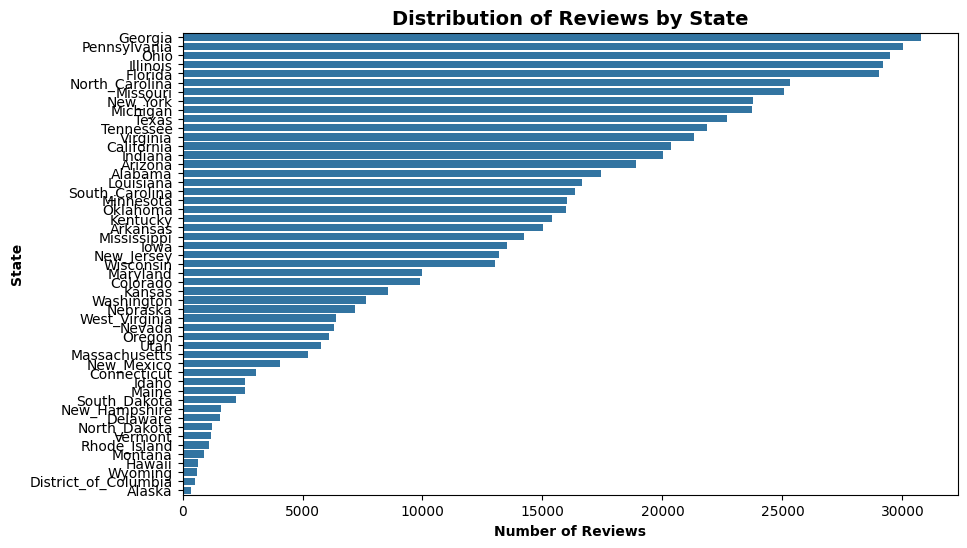

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of reviews for each state
state_review_counts = df_Google_reviews_CS["state_review"].value_counts()

# Plot the distribution of reviews by State in descending order
plt.figure(figsize=(10, 6))
sns.countplot(
    y="state_review", data=df_Google_reviews_CS, order=state_review_counts.index
)
plt.title("Distribution of Reviews by State", fontsize=14, weight="bold")
plt.xlabel("Number of Reviews", weight="bold")
plt.ylabel("State", weight="bold")
plt.show()

plt.figure(figsize=(10, 6))

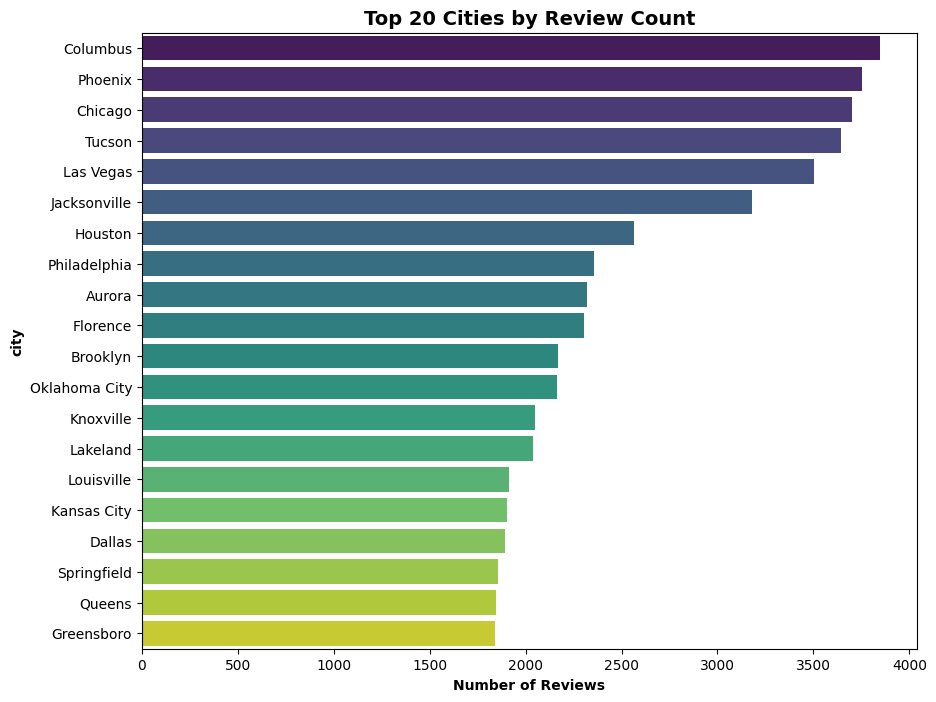

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 20 cities by review count
top_20_cities = df_Google_reviews_CS["city"].value_counts().head(20)

# Plot the distribution of reviews for the top 20 cities
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_20_cities.values,
    y=top_20_cities.index,
    hue=top_20_cities.index,
    palette="viridis",
    legend=False,
)
plt.title("Top 20 Cities by Review Count", fontsize=14, weight="bold")
plt.xlabel("Number of Reviews", weight="bold")
plt.ylabel("city", weight="bold")
plt.show()